# Workforce Reduction Analytics
# 1. Introduction

Global workforce reductions have become a defining feature of the modern business environment. Economic uncertainty, shifts in investor expectations, rapid technological change, and post-pandemic market corrections have pushed organizations across industries to recalibrate their cost structures. Layoffs, while often publicly discussed as isolated events, are better understood as part of larger structural patterns that reflect business health, operational decisions, and sector-level dynamics.

This project examines a curated dataset of global company layoffs sourced from Kaggle. It contains information on company size, industry, funding, geographic location, layoff magnitude, percentage reduction, and organizational stage. By analyzing these variables collectively, the study seeks to uncover meaningful patterns in workforce reductions and provide evidence-based guidance for two key audiences:

- Job seekers evaluating career stability and sector opportunity.
- Investors assessing organizational resilience, industry risk, and capital allocation decisions.

The analysis focuses strictly on exploratory analytics. Modeling will not be performed in this phase; instead, the objective is to build a deep foundational understanding of workforce contraction patterns, which will inform more advanced time-series and predictive modeling in a subsequent project.

# 2. Business Understanding
## 2.1 Problem Context

Layoffs serve as a strategic lever for companies navigating financial pressures, operational inefficiencies, overexpansion during growth cycles, or shifts in market conditions. While layoffs reduce short-term costs, they also signal deeper organizational realities such as poor demand forecasting, market saturation, scaling challenges, or investor-driven restructuring.

For job seekers, understanding which industries or regions exhibit frequent or severe layoffs can shape smarter career decisions. For investors, patterns of workforce reduction can serve as early warning indicators of operational stress, misaligned growth strategies, or diminishing return on capital. A systematic analysis of layoff trends therefore provides actionable intelligence for both groups.

## 2.2 Main Objective

To analyze global layoff patterns across industries, geographies, funding levels, and company stages in order to identify key drivers of workforce reduction and derive strategic insights for workforce planning, job search strategies, and investment decision-making.

## 2.3 Specific Objectives

- Quantify the magnitude and distribution of layoffs across industries, countries, and continents.
- Compare workforce size before and after layoffs to measure levels of organizational contraction.
- Examine whether company size, funding raised, or growth stage influences the scale or likelihood of layoffs.
- Identify industries and regions with recurring patterns of workforce reduction. 
- Generate data-driven recommendations for individuals seeking employment stability and for investors evaluating business resilience.

## 2.4 Success Criteria and Metrics

The project will be considered successful if it achieves the following:    
- Produces clear, statistically coherent visualizations illustrating layoff patterns.
- Identifies specific industries, regions, and company stages with significantly high or low layoff activity.
- Highlights quantifiable relationships between funding, company size, and the magnitude of layoffs.
- Generates evidence-backed recommendations that job seekers and investors can realistically apply.
- Establishes an analytical foundation suitable for deeper modeling in the next project phase.

# 3. Data Understanding

This section provides a detailed review of the dataset used in the analysis, including stakeholder considerations, data structure, attribute descriptions, and key characteristics relevant to the business problem.

## 3.1 Stakeholders

The insights generated from this dataset directly support several decision-making groups:

- Job Seekers
Individuals evaluating which industries, company types, and geographic regions offer the highest employment stability.
- Investors and Venture Capital Firms
Stakeholders who assess organizational resilience, capital efficiency, and sector risk in order to make informed investment decisions.
**Business Analysts and Organizational Strategists**
Professionals responsible for interpreting market signals and operational health indicators within and across industries.
**Policy and Labor Market Analysts**
Entities monitoring macroeconomic workforce trends, especially across continents and major economic centers.

Each stakeholder group benefits from a structured interpretation of the patterns underlying global layoffs.
## 3.2 Dataset Source

The dataset was sourced from Kaggle, a public data science repository. It provides global layoff records across multiple industries and continents. The dataset represents an aggregation of reported layoffs and is suitable for cross-sectional exploratory analysis.
## 3.3 Dataset Structure and Variables

The dataset contains 1418 records, each representing a unique company layoff event. It consists of 16 variables capturing company characteristics, geography, financial attributes, and workforce changes. All records are complete with no missing values, which simplifies preprocessing.

**Variable Overview**
Below is a summary of the dataset columns and their business relevance:    

**Column	Type**	        **Description**    
Company	Object -Name of the organization where layoffs occurred.     

Location_HQ	Object-	City or region of the company headquarters. Useful for geospatial clustering.   

Country	Object-	Country of the headquarters.    

Continent	Object-	Continental grouping to analyze cross-regional workforce trends.    

Laid_Off	Integer-	Absolute number of employees laid off. Core metric for analysis.   

Date_layoffs	Datetime-	Exact date of the layoff event. Used for timeline and trend context.    

Percentage	Float-	Percentage of the workforce impacted. A key indicator of layoff severity.     

Company_Size_before_Layoffs	Integer-	Headcount before the layoff event. Enables contraction measurement.    

Company_Size_after_layoffs	Integer-	Headcount after layoffs. Shows the scale of operational impact.     

Industry	Object-	Industry classification, essential for sector-level risk assessment.     

Stage	Object-	Funding or lifecycle stage (e.g., Series H, Post-IPO). Indicates maturity and financial stability.     

Money_Raised_in_$_mil	Object-	Reported capital raised. Currently stored as an object because of currency symbols; will require cleaning.
Year	Integer-	Year of the layoff event. Useful for high-level temporal grouping.    

lat	Float-	Latitude of company HQ. Supports geographic visualization.     

lng	Float-	Longitude of company HQ. Supports geographic visualization.

**Key Data Characteristics**
No missing values across all columns, ensuring data completeness.
Mixed data types: numeric, categorical, geographic coordinates, and temporal.
Money_Raised_in_$_mil is stored as text due to the dollar symbol; it requires preprocessing to convert into numeric format.
Layoff magnitude is represented both in absolute terms (Laid_Off) and relative terms (Percentage), enabling nuanced interpretation.
Geospatial variables (lat, lng) make geographic clustering and mapping possible.

3.4 Data Value to the Business Problem

This dataset offers multiple analytical pathways that directly support the project’s objectives:
Enables regional, industry, and stage-level comparison of workforce reductions.
Supports identification of high-risk business environments for job seekers.
Highlights structural inefficiencies or funding-related vulnerabilities for investors.
Offers context for operational contraction through headcount before and after layoffs.
Facilitates geospatial insights into global layoff hotspots.

Collectively, the data provides a rich basis for understanding workforce reduction patterns and translating them into actionable recommendations for employment and investment decisions.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_excel('tech_layoffs.xlsx')
df.head(15)

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942
5,16,Bolt,San Francisco Bay Area,USA,North America,130,2023-12-14,29.0,450,320,Finance,Series E,$1300,2023,37.77493,-122.41942
6,20,Invitae,San Francisco Bay Area,USA,North America,235,2023-12-13,15.0,1567,1332,Healthcare,Post-IPO,2500,2023,37.77493,-122.41942
7,21,Etsy,New York City,USA,North America,225,2023-12-13,11.0,2045,1820,Retail,Post-IPO,$97,2023,40.71427,-74.00597
8,27,Chipper Cash,San Francisco Bay Area,USA,North America,15,2023-12-11,33.0,45,30,Finance,Series C,$302,2023,37.77493,-122.41942
9,31,Zulily,Seattle,USA,North America,839,2023-12-08,100.0,839,0,Retail,Acquired,$194,2023,47.60621,-122.33207


In [ ]:
# Previewing the shape
df.shape

(1418, 16)

The dataset has a total of 1418 records and 16 columns

In [ ]:
# Previewing general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1418 non-null   int64         
 1   Company                      1418 non-null   object        
 2   Location_HQ                  1418 non-null   object        
 3   Country                      1418 non-null   object        
 4   Continent                    1418 non-null   object        
 5   Laid_Off                     1418 non-null   int64         
 6   Date_layoffs                 1418 non-null   datetime64[ns]
 7   Percentage                   1418 non-null   float64       
 8   Company_Size_before_Layoffs  1418 non-null   int64         
 9   Company_Size_after_layoffs   1418 non-null   int64         
 10  Industry                     1418 non-null   object        
 11  Stage                        1418 non-null 

In [18]:
# Previewing the columns
df.columns

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

In [19]:
# Previewing data distribution
df.describe()

,#,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1418.000000,1418.000000,1418,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,1823.411848,267.392102,2022-05-03 22:26:34.358251008,21.901584,3556.228491,3288.836389,2021.878702,33.787884,-59.648503
min,3.000000,3.000000,2020-03-12 00:00:00,0.044980,4.000000,0.000000,2020.000000,-41.286640,-123.119340
25%,1038.500000,40.000000,2022-02-17 06:00:00,10.000000,213.000000,151.250000,2022.000000,34.052230,-122.272333
50%,1882.500000,86.000000,2022-09-23 00:00:00,15.000000,531.000000,430.000000,2022.000000,37.774930,-79.398640
75%,2616.250000,200.000000,2023-02-09 00:00:00,27.000000,1414.750000,1200.000000,2023.000000,42.331430,-0.125740
max,3290.000000,12000.000000,2024-11-01 00:00:00,100.000000,400000.000000,392000.000000,2024.000000,60.169520,174.775570
std,922.671427,877.468380,NaN,20.661776,22478.365010,21878.258702,1.147283,18.813799,74.471053


The columns count, mean, min and max distribution of the numeric variables vary as shown above for this dataset.

In [21]:
df.describe(include='object').T

,count,unique,top,freq
Company,1418,1128,Uber,5
Location_HQ,1418,132,San Francisco Bay Area,388
Country,1418,37,USA,905
Continent,1418,6,North America,986
Industry,1418,30,Finance,200
Stage,1418,16,Post-IPO,312
Money_Raised_in_$_mil,1418,543,$1300,17


The count, unique values and frequency for each categorical variable can be seen in the above.

# 4. Data Quality Review
A sanity check was performed to confirm that the dataset is consistent, correctly typed, and suitable for exploratory analysis. The focus is on verifying completeness, value ranges, formatting, and basic data integrity.

## 4.1 Check for Missing Values

In [22]:
df.isna().sum()

#                              0
Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lat                            0
lng                            0
dtype: int64

All 16 columns show 0 missing values, indicating the dataset is complete and requires no imputation or removal steps.

## 4.2 Data Types Review


In [23]:
df.dtypes

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

No incorrect types except for money_raised_$ this will be cleaned before analysis

## 4.3 Range and logical consistency


In [24]:
df['Percentage'].between(0,100).all()

True

All are valid and realistic

In [25]:
# Company size before and after layoff
(df['Company_Size_after_layoffs'] <=df['Company_Size_before_Layoffs']).all()

True

All values meet logical expectations

In [27]:
# Latitude and Longitudes
df['lat'].between(-90,90).all()
df['lng'].between(-180,180).all()

True

All coordinates are valid

In [37]:
# Garbage Values
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print("'''"*10)

Company
Uber        5
Blend       5
Gopuff      5
Swiggy      5
Unity       5
           ..
&Open       1
Cisco       1
Wayflyer    1
Getir       1
Trigo       1
Name: count, Length: 1128, dtype: int64
''''''''''''''''''''''''''''''
Location_HQ
San Francisco Bay Area    388
New York City             160
Bengaluru                  64
Boston                     60
Los Angeles                51
                         ... 
Kfar Saba                   1
Noida                       1
Frankfurt                   1
Bangkok                     1
Lisbon                      1
Name: count, Length: 132, dtype: int64
''''''''''''''''''''''''''''''
Country
USA                        905
India                      101
Canada                      79
Israel                      52
Germany                     51
United Kingdom              49
Brazil                      48
Australia                   26
Singapore                   19
Sweden                      14
Indonesia                    8
France

There seem to be no placeholders in this dataset

## 4.4 Duplicate Records

In [28]:
df.duplicated().sum()

0

No duplicates encountered

In [31]:
# Cleaning the money raise column
df['Money_Raised_in_$_mil'] = (df['Money_Raised_in_$_mil'].replace('[\$]','', regex=True).astype(float))

# 5. Exploratory Data Analysis (EDA)

This EDA is structured into:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
Insight Summary for each analysis

## 5.1  Univariate Analysis
How are individual features distributed and what insight can we get from this analysis?

In [35]:
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in ['lat','lng']]
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns]
numeric_cols

['#',
 'Laid_Off',
 'Percentage',
 'Company_Size_before_Layoffs',
 'Company_Size_after_layoffs',
 'Money_Raised_in_$_mil',
 'Year']

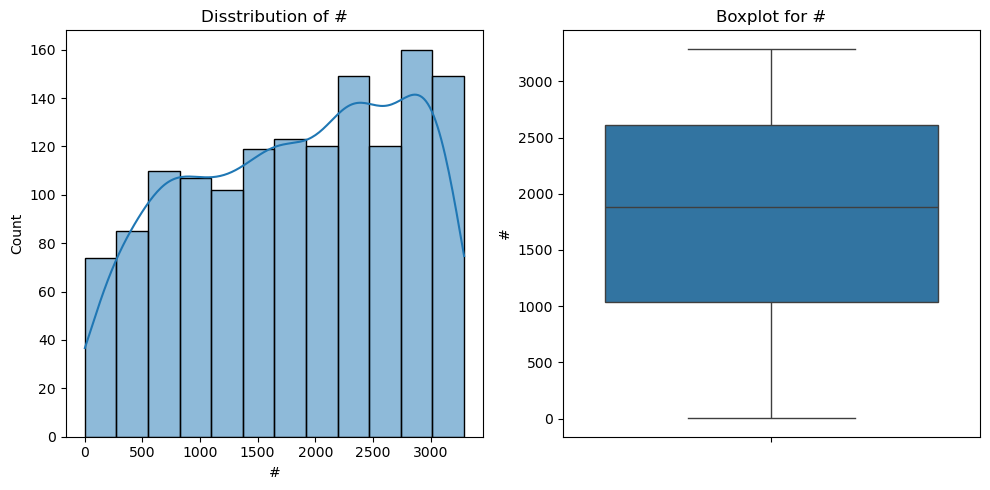

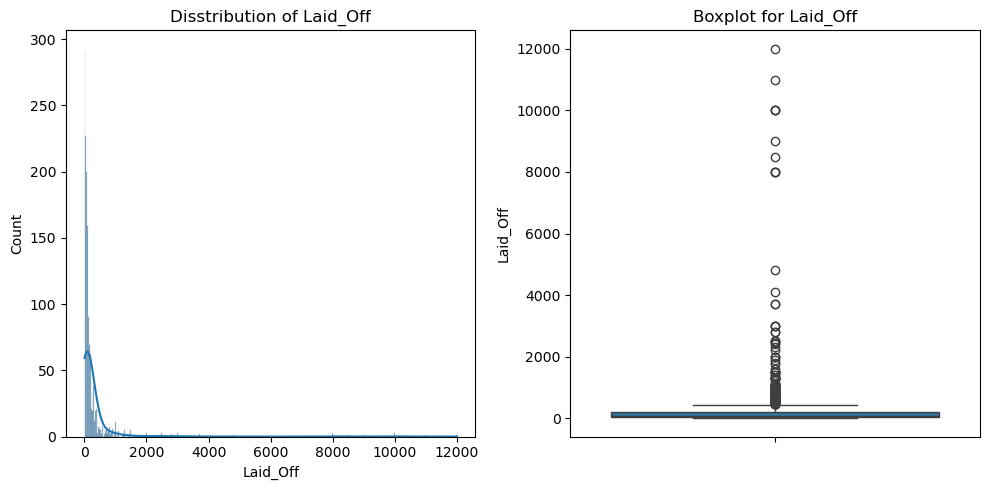

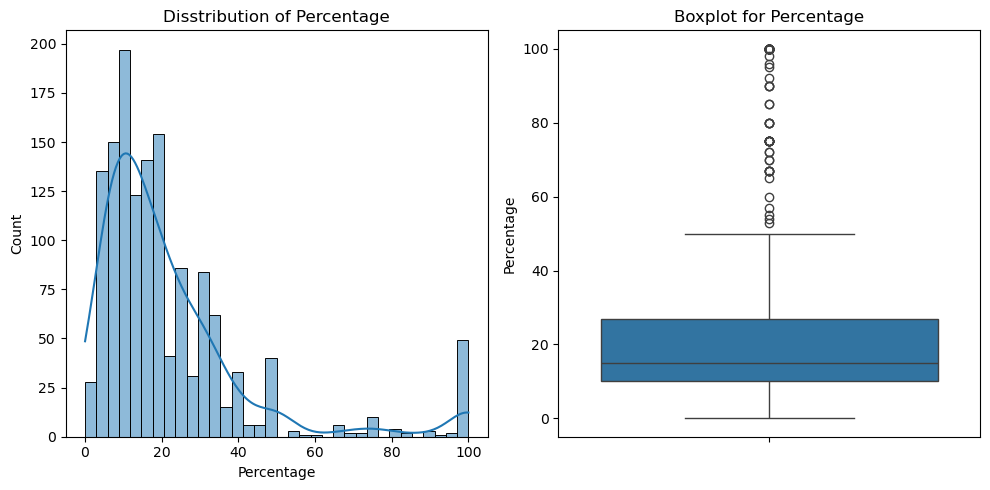

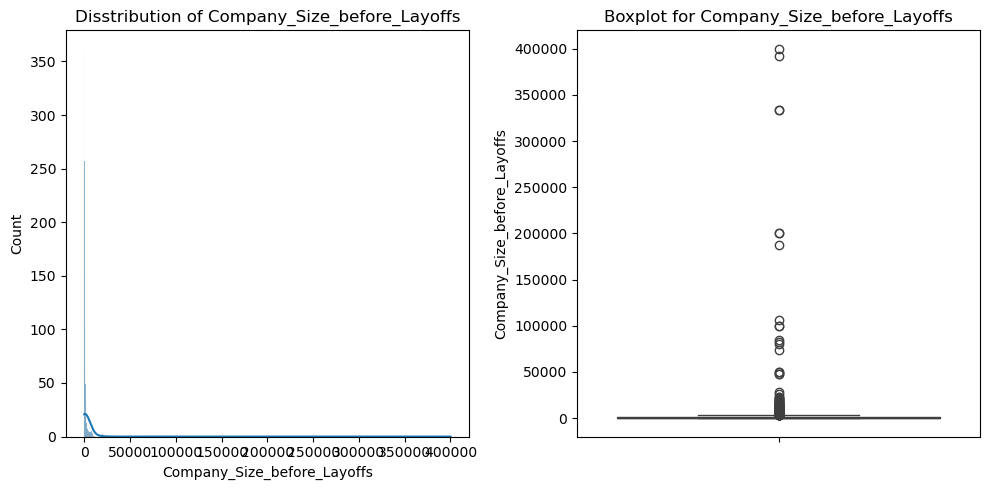

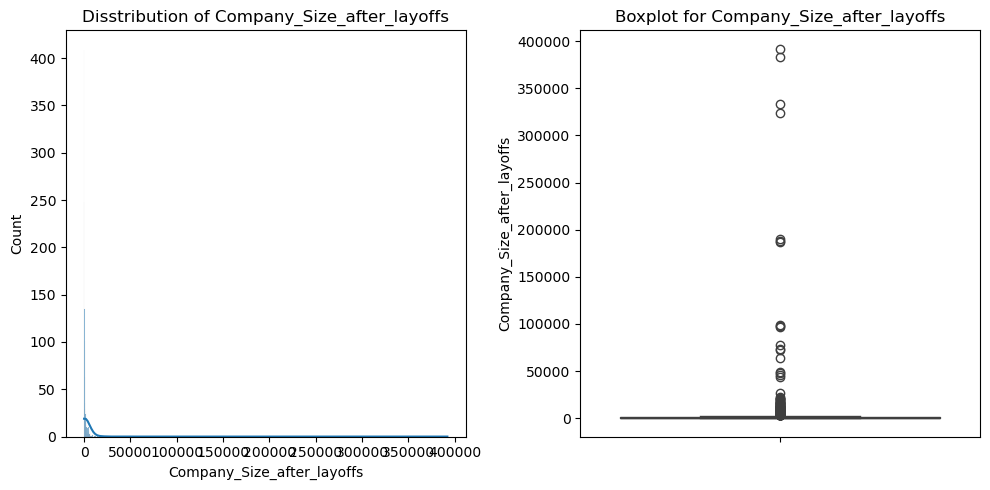

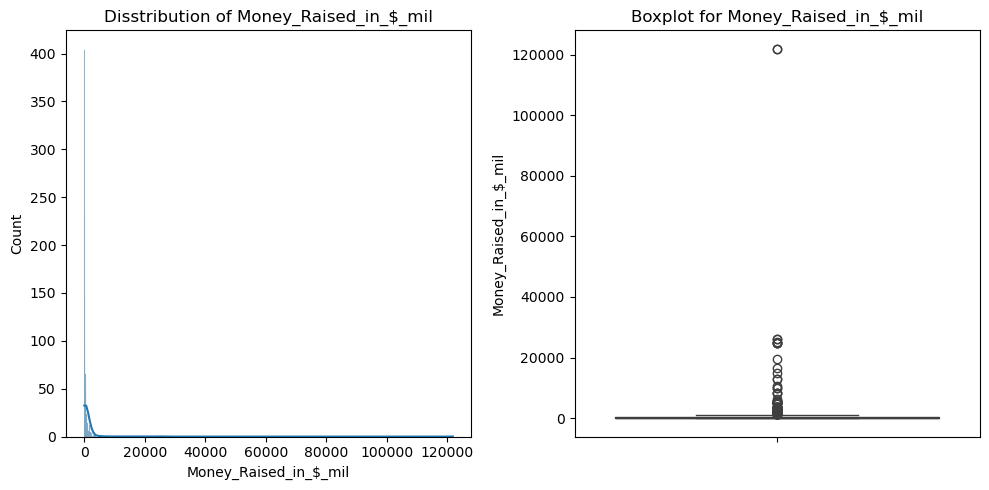

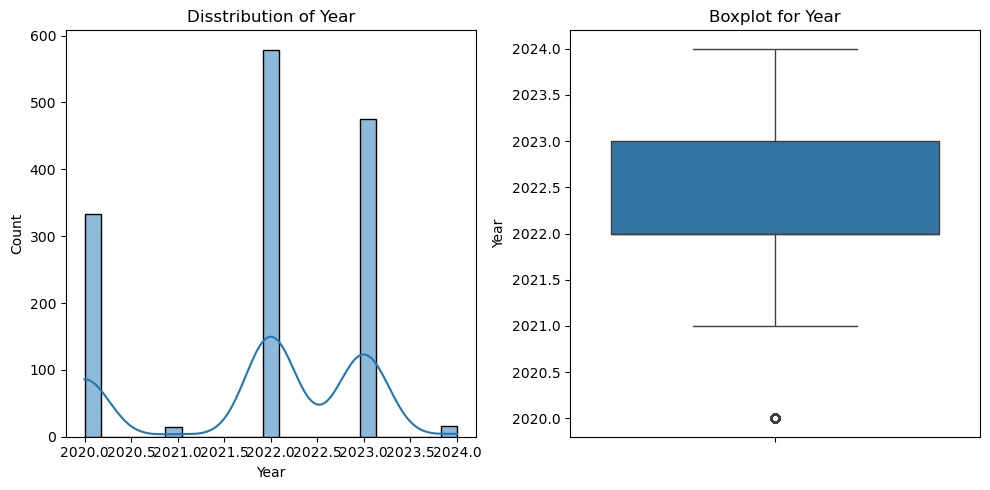

In [34]:
# For numeric columns
for col in numeric_cols:
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    sns.histplot(df[col],kde=True, ax=axes[0])
    axes[0].set_title(f'Disstribution of {col}')

    sns.boxplot(df[col],ax=axes[1])
    axes[1].set_title(f'Boxplot for {col}')

    plt.tight_layout()
    plt.show()


Most of this features are right-skewed, the # is left-skewed while year is a trimodal distribution due to the 3 spikes that are visible. Most of this feature also has outliers, we will deal with them by using interquartile range that reduces their variance while retaining the same datapoints.

In [ ]:
# Capping Outliers
import numpy as np
import pandas as pd

# 1. Define the columns you want to analyze
features = [
    'Laid_Off',
    'Percentage',
    'Company_Size_before_Layoffs',
    'Company_Size_after_layoffs',
    'Money_Raised_in_$_mil',
    'Year'
]

# Create an empty dictionary to store the results
outlier_metrics = {}

# 2. Loop through each feature (column)
for column in features:
    # Check if the column exists in the DataFrame to avoid errors (good practice!)
    if column in df.columns:
        # Step A: Calculate Quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Step B: Calculate IQR
        IQR = Q3 - Q1

        # Step C: Calculate Outlier Boundaries
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # 3. Store the results for reference
        outlier_metrics[column] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower_Bound (1.5)': lower_bound,
            'Upper_Bound (1.5)': upper_bound
        }

# 4. Print the final results for all columns
for column, metrics in outlier_metrics.items():
    print(f"--- Metrics for: {column} ---")
    print(f"  Q1: {metrics['Q1']:.2f}")
    print(f"  Q3: {metrics['Q3']:.2f}")
    print(f"  IQR: {metrics['IQR']:.2f}")
    print(f"  Lower Outlier Boundary: {metrics['Lower_Bound (1.5)']:.2f}")
    print(f"  Upper Outlier Boundary: {metrics['Upper_Bound (1.5)']:.2f}")
    print("-" * 30)

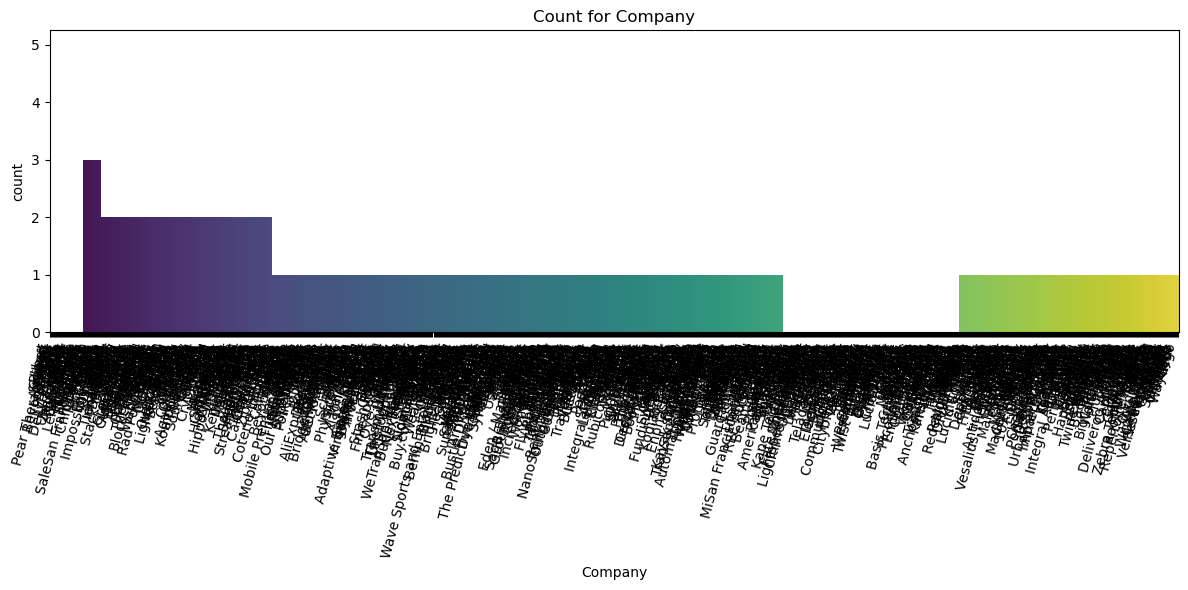

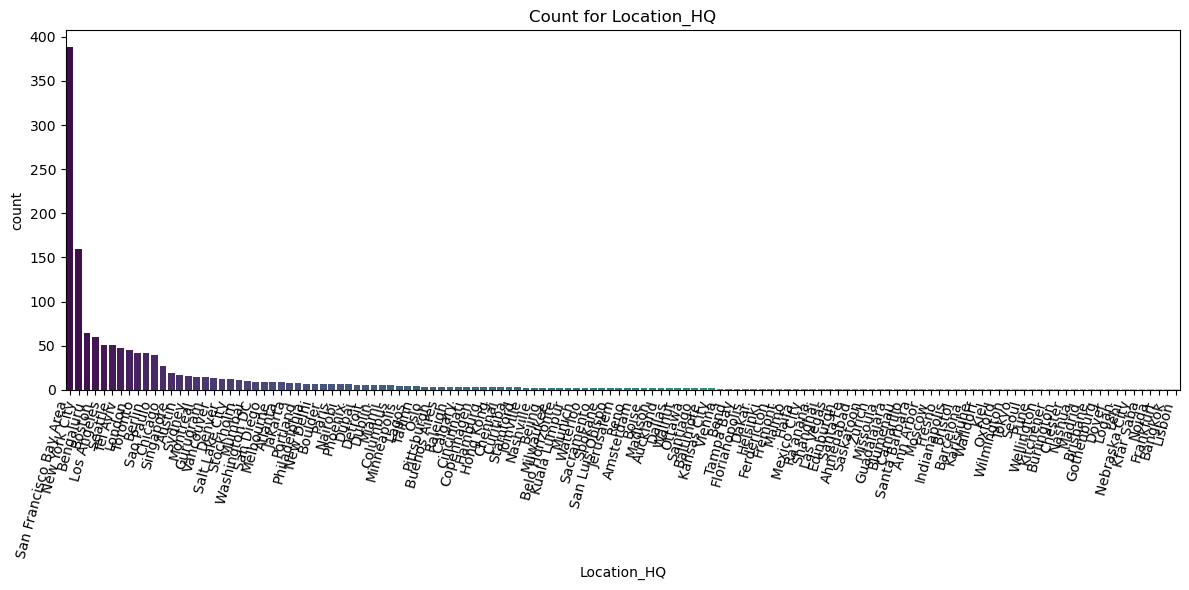

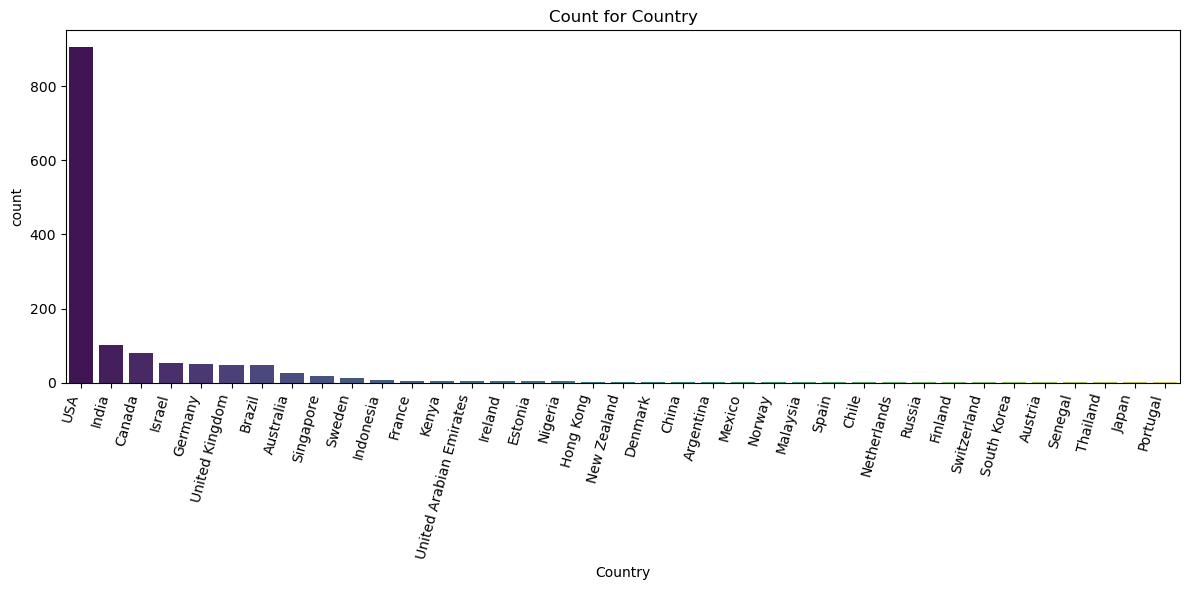

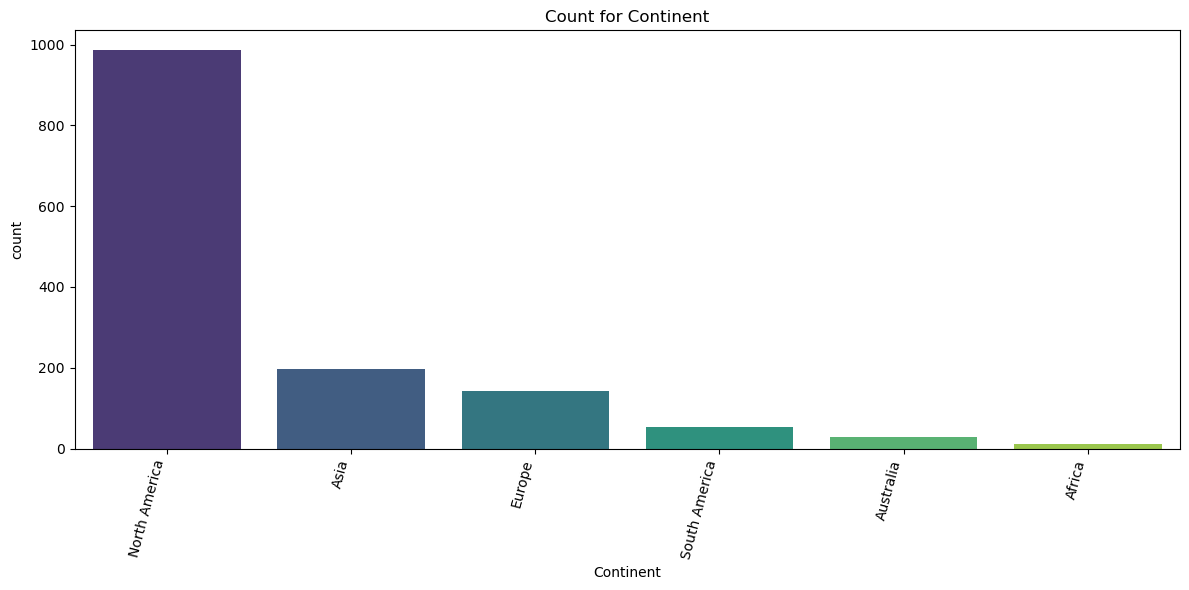

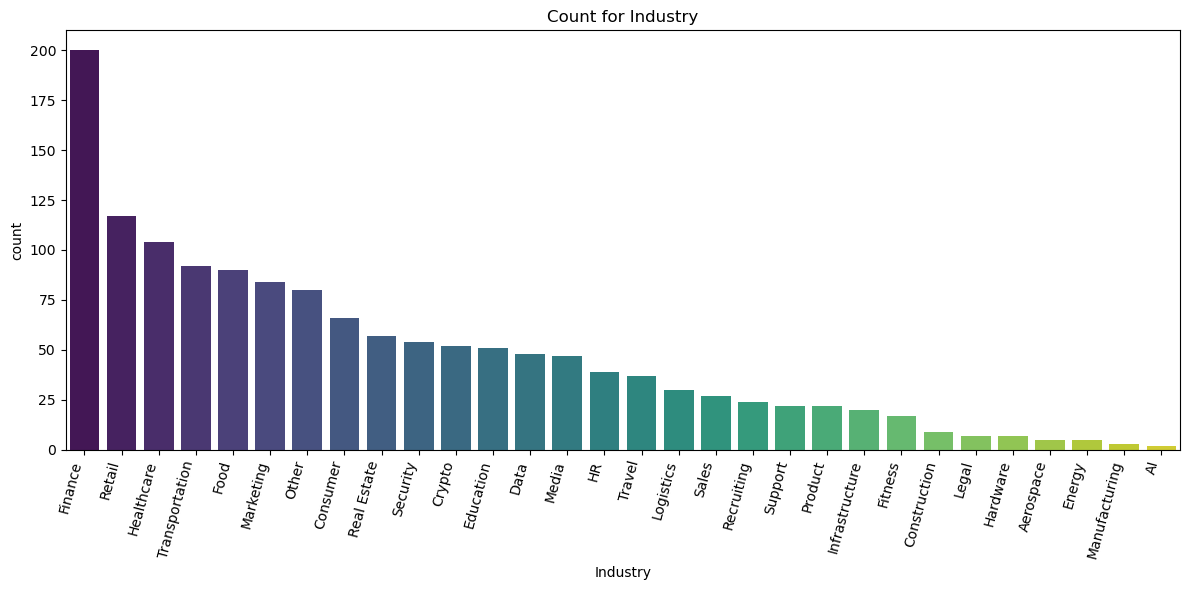

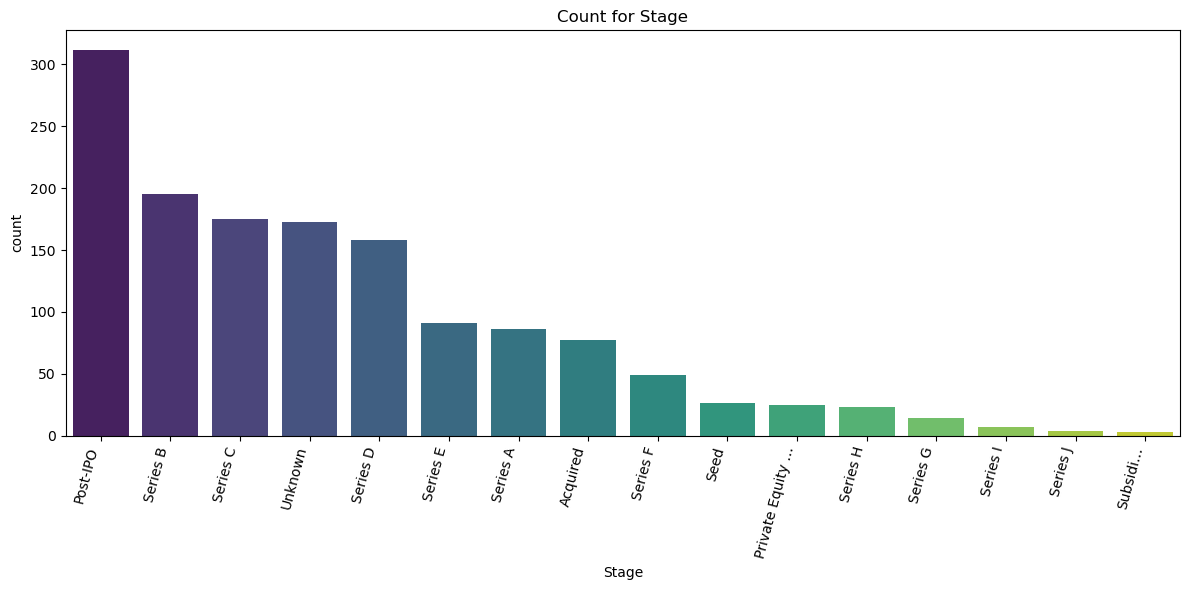

In [40]:
# For categorical columns
for col in categorical_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df,x=col,order=df[col].value_counts().index,palette='viridis')
    plt.xticks(rotation=75,ha='right')
    plt.title(f'Count for {col}')
    plt.tight_layout()
    plt.show()

Again disrtibution for all the features seem to be right-skewed.

## 5.2 Bivariate Analysis
Lets find out more bout how different features relate to each other and whether we can gain more insights about workforce reduction by companies.

### 5.2.1 Which industries had the deepest cutsin workforce proportionally?

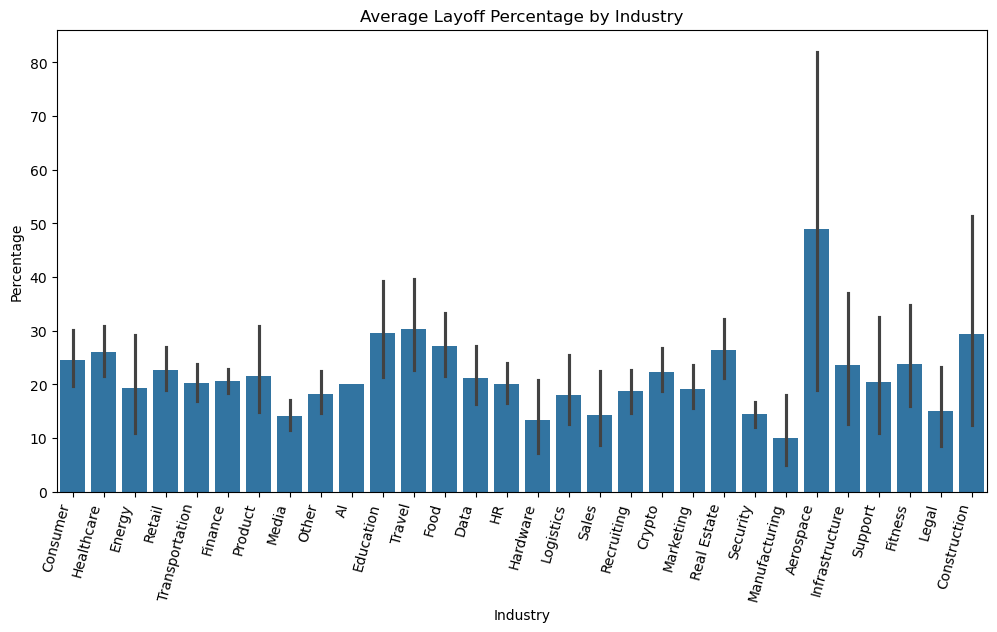

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Industry', y='Percentage', estimator='mean')
plt.xticks(rotation=75, ha='right')
plt.title('Average Layoff Percentage by Industry')
plt.show()
